<a href="https://colab.research.google.com/github/Nagarjuna-GHub/Machine_Learning/blob/main/SARIMA_Airtel_Stock_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import files
uploaded = files.upload()

Saving BHARTIARTL_Indian_Stock.csv to BHARTIARTL_Indian_Stock.csv


# **Reading CSV**

In [4]:
import io
df = pd.read_csv(io.BytesIO(uploaded['BHARTIARTL_Indian_Stock.csv']))
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-04,553.549988,585.000000,549.799988,573.150024,571.098816,818083.0
1,2020-06-05,590.000000,590.000000,567.700012,584.900024,582.806824,1513499.0
2,2020-06-08,589.950012,593.700012,579.549988,584.750000,582.657288,838800.0
3,2020-06-09,580.000000,591.750000,566.000000,567.599976,565.568665,462101.0
4,2020-06-10,570.049988,576.000000,563.299988,567.250000,565.219910,474220.0


In [5]:
df.shape

(252, 7)

In [6]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,251.000000,251.000000,251.000000,251.000000,251.000000,2.510000e+02
mean,527.130876,533.410957,518.037450,524.888644,524.525717,7.491988e+05
std,49.035098,49.116702,48.513017,48.720658,48.419642,5.654613e+05
min,397.299988,404.549988,394.049988,397.250000,397.250000,1.297950e+05
25%,503.699997,508.475006,494.000000,502.975006,502.975006,3.789685e+05
50%,531.849976,536.000000,524.799988,530.150024,530.150024,5.894380e+05
75%,563.475006,571.475006,555.024994,560.699982,560.225006,9.523245e+05
max,618.299988,623.000000,599.549988,608.799988,608.799988,3.906544e+06


In [7]:
#Checking datatypes, null values, duplicates and unique values
dataframe = pd.DataFrame({'Dtypes':df.dtypes, 'Null_values':df.isnull().sum,'Duplicates': df.duplicated().sum(),'unique': df.nunique()})
dataframe

,Dtypes,Null_values,Duplicates,unique
Date,object,<bound method DataFrame.sum of Date Op...,0,252
Open,float64,<bound method DataFrame.sum of Date Op...,0,221
High,float64,<bound method DataFrame.sum of Date Op...,0,230
Low,float64,<bound method DataFrame.sum of Date Op...,0,235
Close,float64,<bound method DataFrame.sum of Date Op...,0,242
Adj Close,float64,<bound method DataFrame.sum of Date Op...,0,243
Volume,float64,<bound method DataFrame.sum of Date Op...,0,251


In [8]:
#Converting Datatype of Date to datetime
df.Date=pd.to_datetime(df.Date)

In [9]:
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume              float64
dtype: object

# **Data visualization**

In [10]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [11]:
features = ['Open', 'High', 'Low', 'Volume']

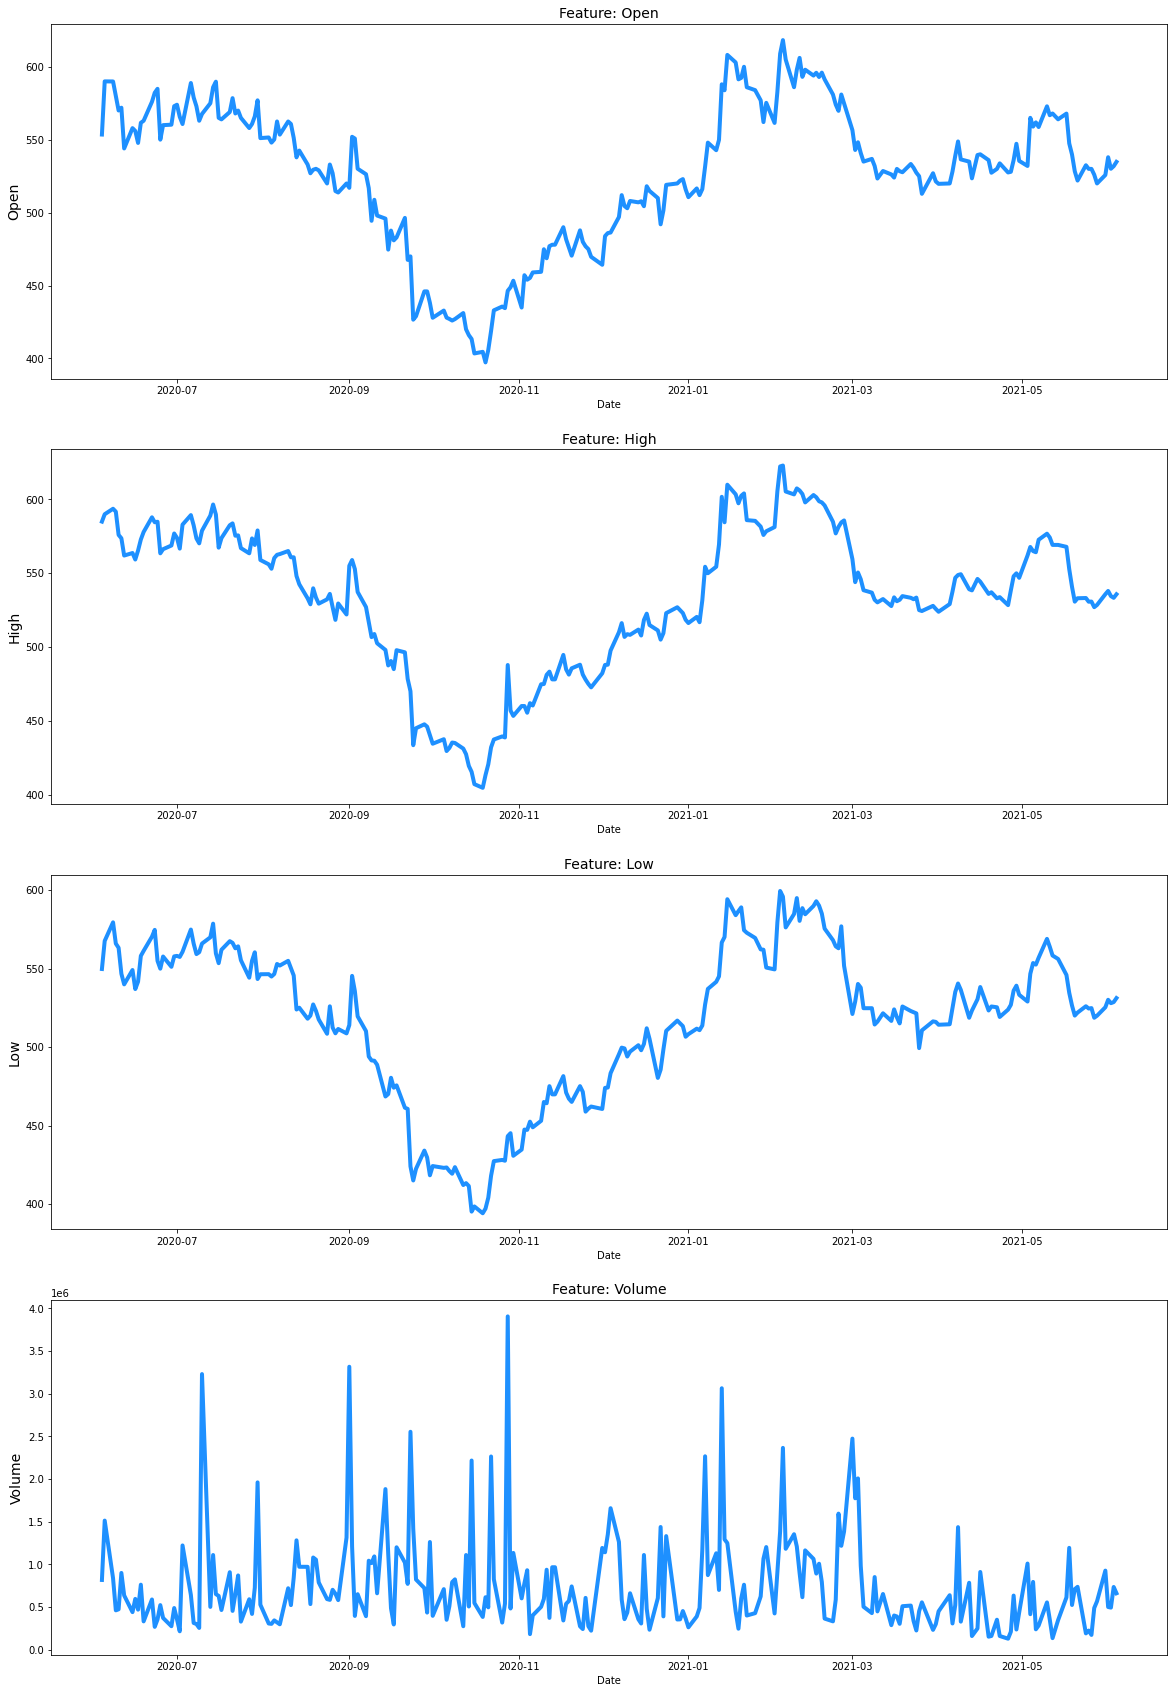

In [12]:
#Plotting for all features with respect to Date
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(20, 30))

for i, column in enumerate(features):
    sns.lineplot(x=df['Date'], y=df[column].fillna(method='ffill'), ax=ax[i], color='dodgerblue', linewidth=4)
    ax[i].set_title('Feature: {}'.format(column), fontsize=14)
    ax[i].set_ylabel(ylabel=column, fontsize=14)
    
                      

# **Data Pre-processing**

In [17]:
df.isnull().sum()

Date         0
Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [18]:
#here we are only concentarting on Close Feature. Hence dropping other columns
df.drop(['Adj Close','Open','High','Volume','Low'], axis=1, inplace=True)

In [19]:
df.dropna(inplace=True)

In [20]:
df.isnull().sum()

Date     0
Close    0
dtype: int64

# **Stationarity Check**

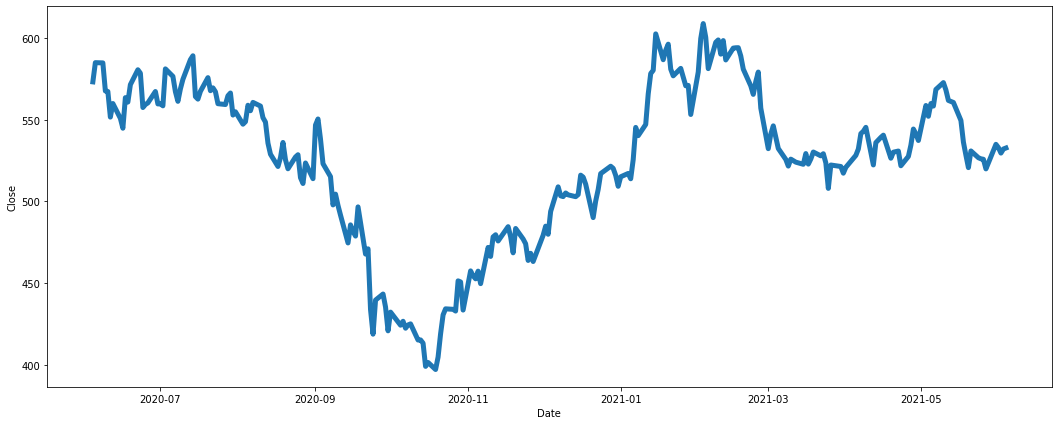

In [21]:
ax=plt.figure(figsize=(18,7))
sns.lineplot( x = df['Date'], y = df['Close'], linewidth = 5)


Graph looks Non-stationary as the mean keep increasing, However we check using Mean and variance

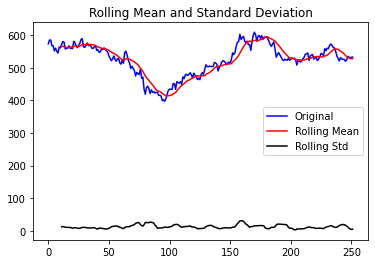

In [22]:
df_close = df['Close']

def test_stationarity(timeseries):
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.title('Rolling Mean and Standard Deviation')
    plt.legend(loc='best')
    plt.show(block=False)
    
test_stationarity(df_close)


Through the above graph, we can see the increasing mean and standard deviation and hence our series is not stationary.

**ADF (Augmented Dickey-Fuller) Test**

The Dickey-Fuller test is one of the most popular statistical tests. It can be used to determine the presence of unit root in the series, and hence help us understand if the series is stationary or not.

In [23]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(df['Close'], autolag = 'AIC')

print("1 ADF:", dftest[0])
print("1 P value:", dftest[1])
print("1 No.of Lags:", dftest[2])
print("1 No.of observations used for ADF Regression and critical values Calculation:", dftest[3])
print("5 Critical values:")
for key, val in dftest[4].items():
  print("\t", key, ": ", val)

1 ADF: -1.8172117908882242
1 P value: 0.3719506167668386
1 No.of Lags: 0
1 No.of observations used for ADF Regression and critical values Calculation: 250
5 Critical values:
	 1% :  -3.456780859712
	 5% :  -2.8731715065600003
	 10% :  -2.572968544


We see that the p-value is greater than 0.05 so we cannot reject the Null hypothesis.  so the data is non-stationary.

In order to perform a time series analysis, we may need to separate seasonality and trend from our series. The resultant series will become stationary through this process.

So let us separate Trend and Seasonality from the time series.

<Figure size 432x288 with 0 Axes>

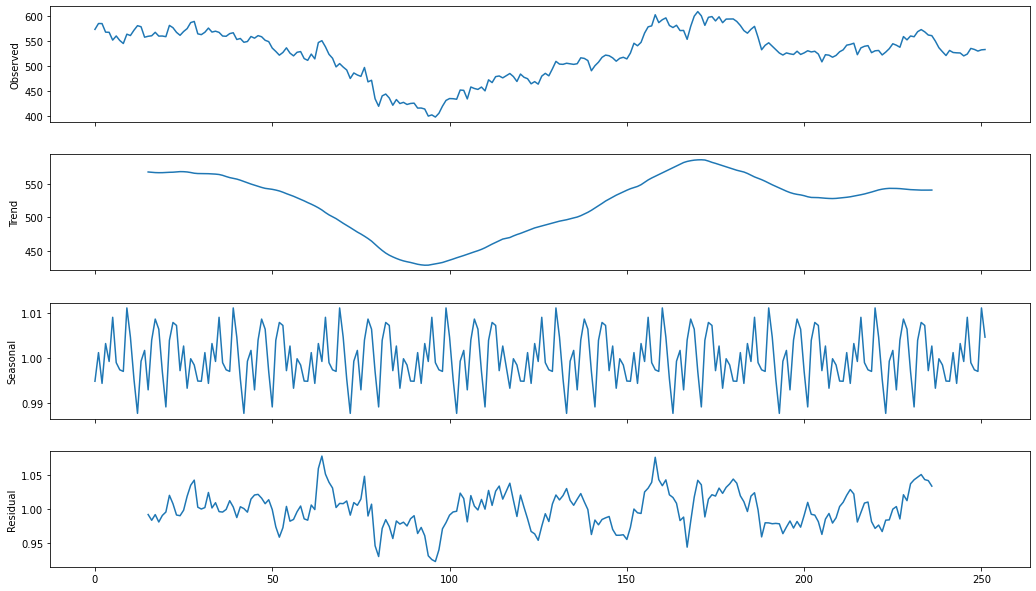

In [24]:
#Decomposing
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_close, model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

we start by taking a log of the series to reduce the magnitude of the values and reduce the rising trend in the series. Then after getting the log of the series, we find the rolling average of the series. A rolling average is calculated by taking input for the past 12 months and giving a mean consumption value at every point further ahead in series.

# **Log_transformation and differencing**

If the data is not stationary but we want to use a model such as ARIMA (that requires this characteristic), the data has to be transformed.

The two most common methods to transform series into stationarity ones are:

**Transformation:** e.g. log or square root to stabilize non-constant variance
**Differencing:** subtracts the current value from the previous

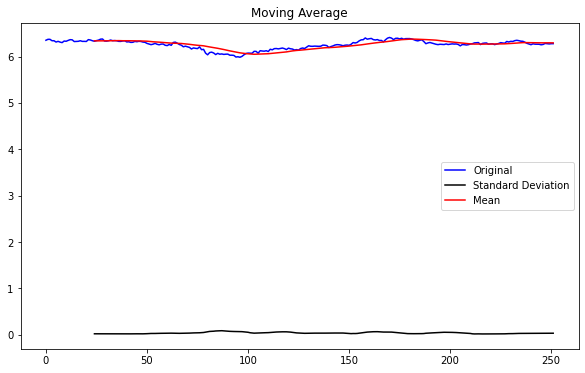

In [25]:
#logTransformation
from pylab import rcParams
rcParams['figure.figsize'] = 10, 6
df_log = np.log(df_close)
moving_avg = df_log.rolling(25).mean()
std_dev = df_log.rolling(25).std()
plt.title('Moving Average')
plt.plot(df_log, color='blue',label='Original')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

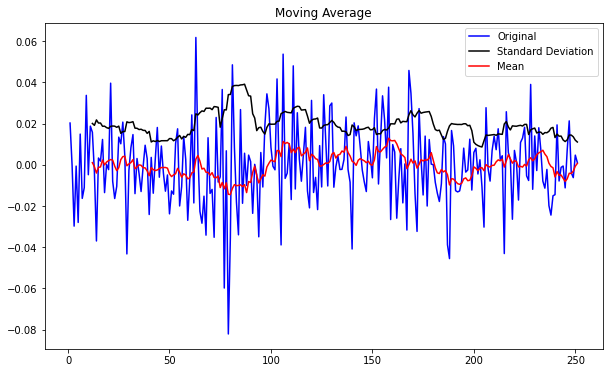

In [26]:
#Applying differencing to Log_values
df_log_diff = df_log-df_log.shift(1)
moving_avg = df_log_diff.rolling(12).mean()
std_dev = df_log_diff.rolling(12).std()
plt.title('Moving Average')
plt.plot(df_log_diff, color='blue',label='Original')
plt.plot(std_dev, color ="black", label = "Standard Deviation")
plt.plot(moving_avg, color="red", label = "Mean")
plt.legend()
plt.show()

we can see the constant mean and standard deviation and hence our series is stationary.

In [27]:
dftest1 = adfuller(df_log_diff.dropna())

print("1 ADF:", dftest1[0])
print("1 P value:", dftest1[1])
print("1 No.of Lags:", dftest1[2])
print("1 No.of observations used for ADF Regression and critical values Calculation:", dftest1[3])
print("5 Critical values:")
for key, val in dftest1[4].items():
  print("\t", key, ": ", val)

1 ADF: -17.269327400783762
1 P value: 5.874296375949637e-30
1 No.of Lags: 0
1 No.of observations used for ADF Regression and critical values Calculation: 249
5 Critical values:
	 1% :  -3.4568881317725864
	 5% :  -2.8732185133016057
	 10% :  -2.5729936189738876


In addtion to the above mean and std confirmation, we can also check the P value applied on log values which is below 0.05. Hence, graph is stationary

# **Autocorrelation Analysis**

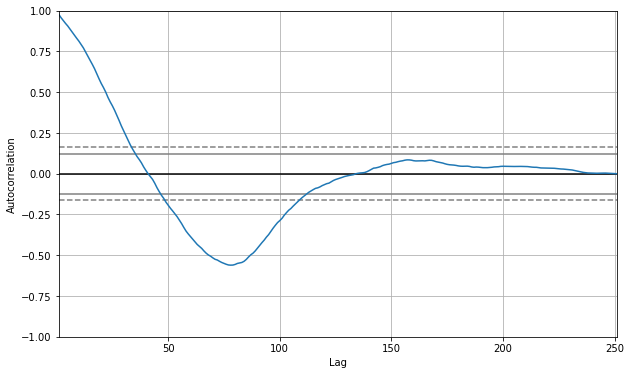

In [24]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(df_log)
plt.show()

**ACF and PACF plots:** After a time series has been stationarized by differencing, the next step in fitting an ARIMA model is to determine whether AR or MA terms are needed to correct any autocorrelation that remains in the differenced series.

By looking at the autocorrelation function (ACF) and partial autocorrelation (PACF) plots of the differenced series, you can tentatively identify the numbers of AR and/or MA terms that are needed.

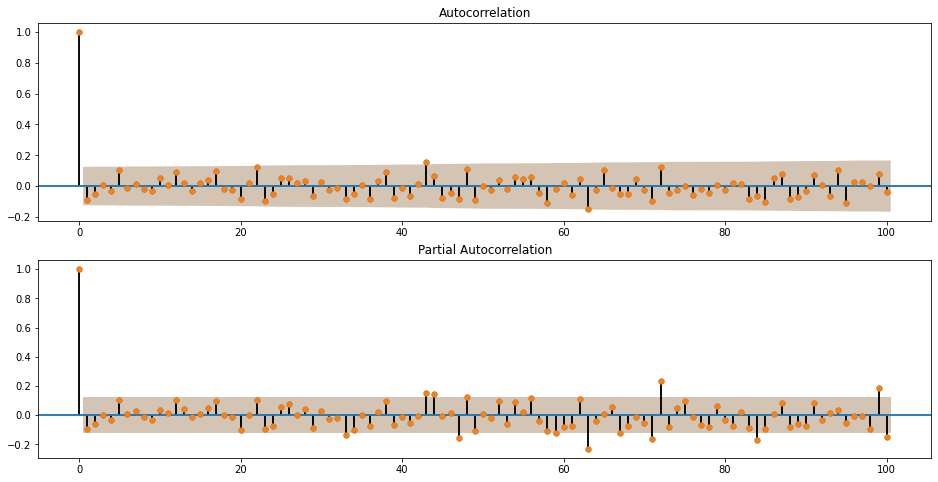

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf


plot_acf(df_log_diff.dropna(), lags=100, ax=ax[0])
plot_pacf(df_log_diff.dropna(), lags=100, ax=ax[1])

# **Modeling**

Identification of an AR model is often best done with the PACF.
Identification of an MA model is often best done with the ACF rather than the PACF.

(p,d,q) 
p-->AR model lags
d--> differencing 
q-->MA lags.

Here p= 0,d= 1 and q= 0

In [32]:
df_log_diff

0           NaN
1      0.020293
2     -0.000257
3     -0.029768
4     -0.000617
         ...   
247    0.021350
248   -0.003839
249   -0.006212
250    0.004709
251    0.001127
Name: Close, Length: 251, dtype: float64

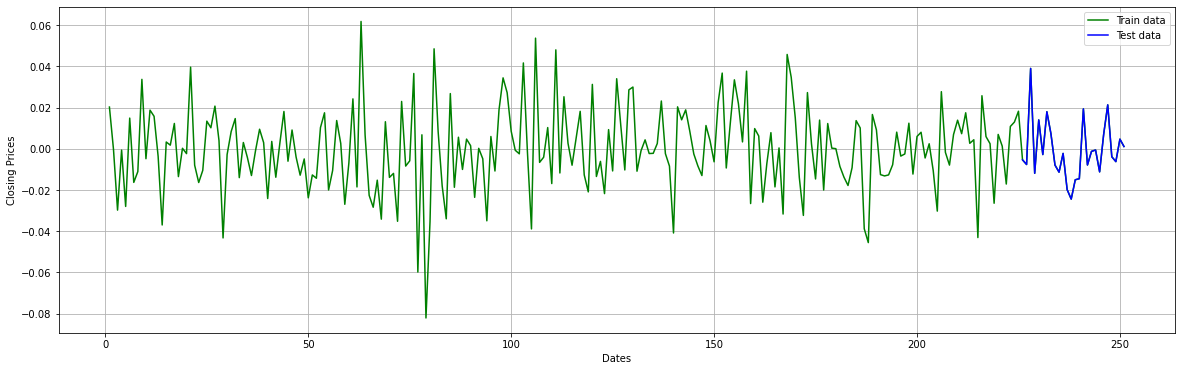

In [34]:
#split data into train and training set
train_data, test_data = df_log_diff[1:int(len(df_log)*0.9)], df_log_diff[int(len(df_log)*0.9):]
plt.figure(figsize=(20,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_log_diff, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [38]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.formula.api as smf
import statsmodels.api as sm
model1 = sm.tsa.statespace.SARIMAX((train_data), order = (0, 1, 0),seasonal_order = (0,1,0,12))
model1 = model1.fit()
model1.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                              Close   No. Observations:                  224
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 371.020
Date:                            Sat, 05 Jun 2021   AIC                           -740.041
Time:                                    12:50:36   BIC                           -736.689
Sample:                                         0   HQIC                          -738.686
                                            - 224                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0017      0.000     11.050      0.000       0.001       0.002
===================================================================================
Ljung-Box (Q):                      180.84   Jarque-Bera (JB):                 1.50
Prob(Q):                              0.00   Prob(JB):                         0.47
Heteroskedasticity (H):               0.72   Skew:                             0.13
Prob(H) (two-sided):                  0.17   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [39]:
#make Predictions on Test set
start = len(train_data)
end = len(train_data)+len(test_data)-1
pred = model1.predict(start = start, end = end, typ = 'levels')
print(pred.head())

224    0.019999
225   -0.027502
226    0.041384
227    0.021541
228    0.018089
dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


In [40]:
#Converting the Index into Date Format
pred.index = df.Date[start:end+1]
print(pred.head())

Date
2021-04-28    0.019999
2021-04-29   -0.027502
2021-04-30    0.041384
2021-05-03    0.021541
2021-05-04    0.018089
dtype: float64


In [48]:
test_data.index = df.Date[start:end+1]

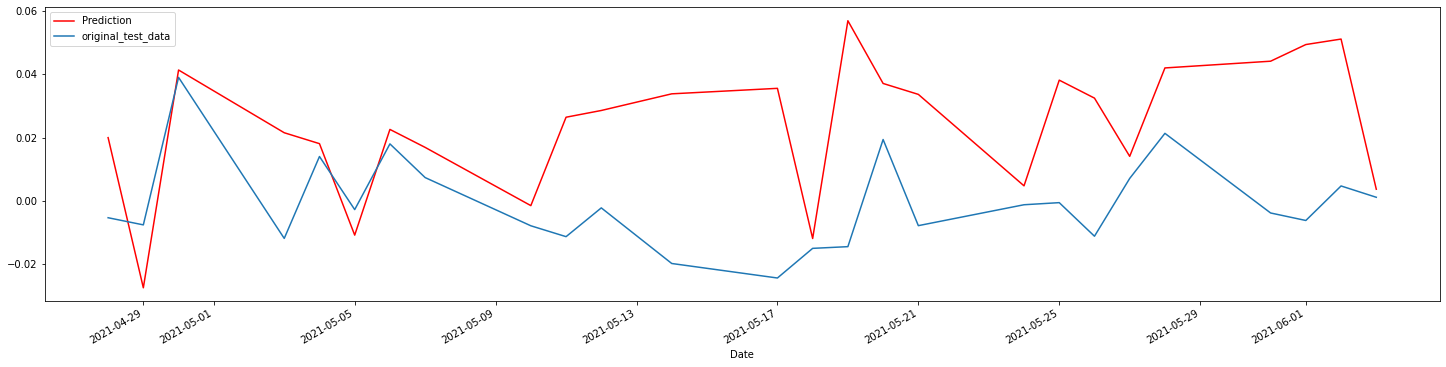

In [52]:
plt.figure(figsize=(25,6))
pred.plot(legend = True, color = 'red', label = 'Prediction')
test_data.plot(legend = True, label = 'original_test_data')


In [ ]:
df['forecast'] = results.predict

In [65]:
train_data.index = df.Date[:end-25]

Text(0, 0.5, 'Actual Stock Price')

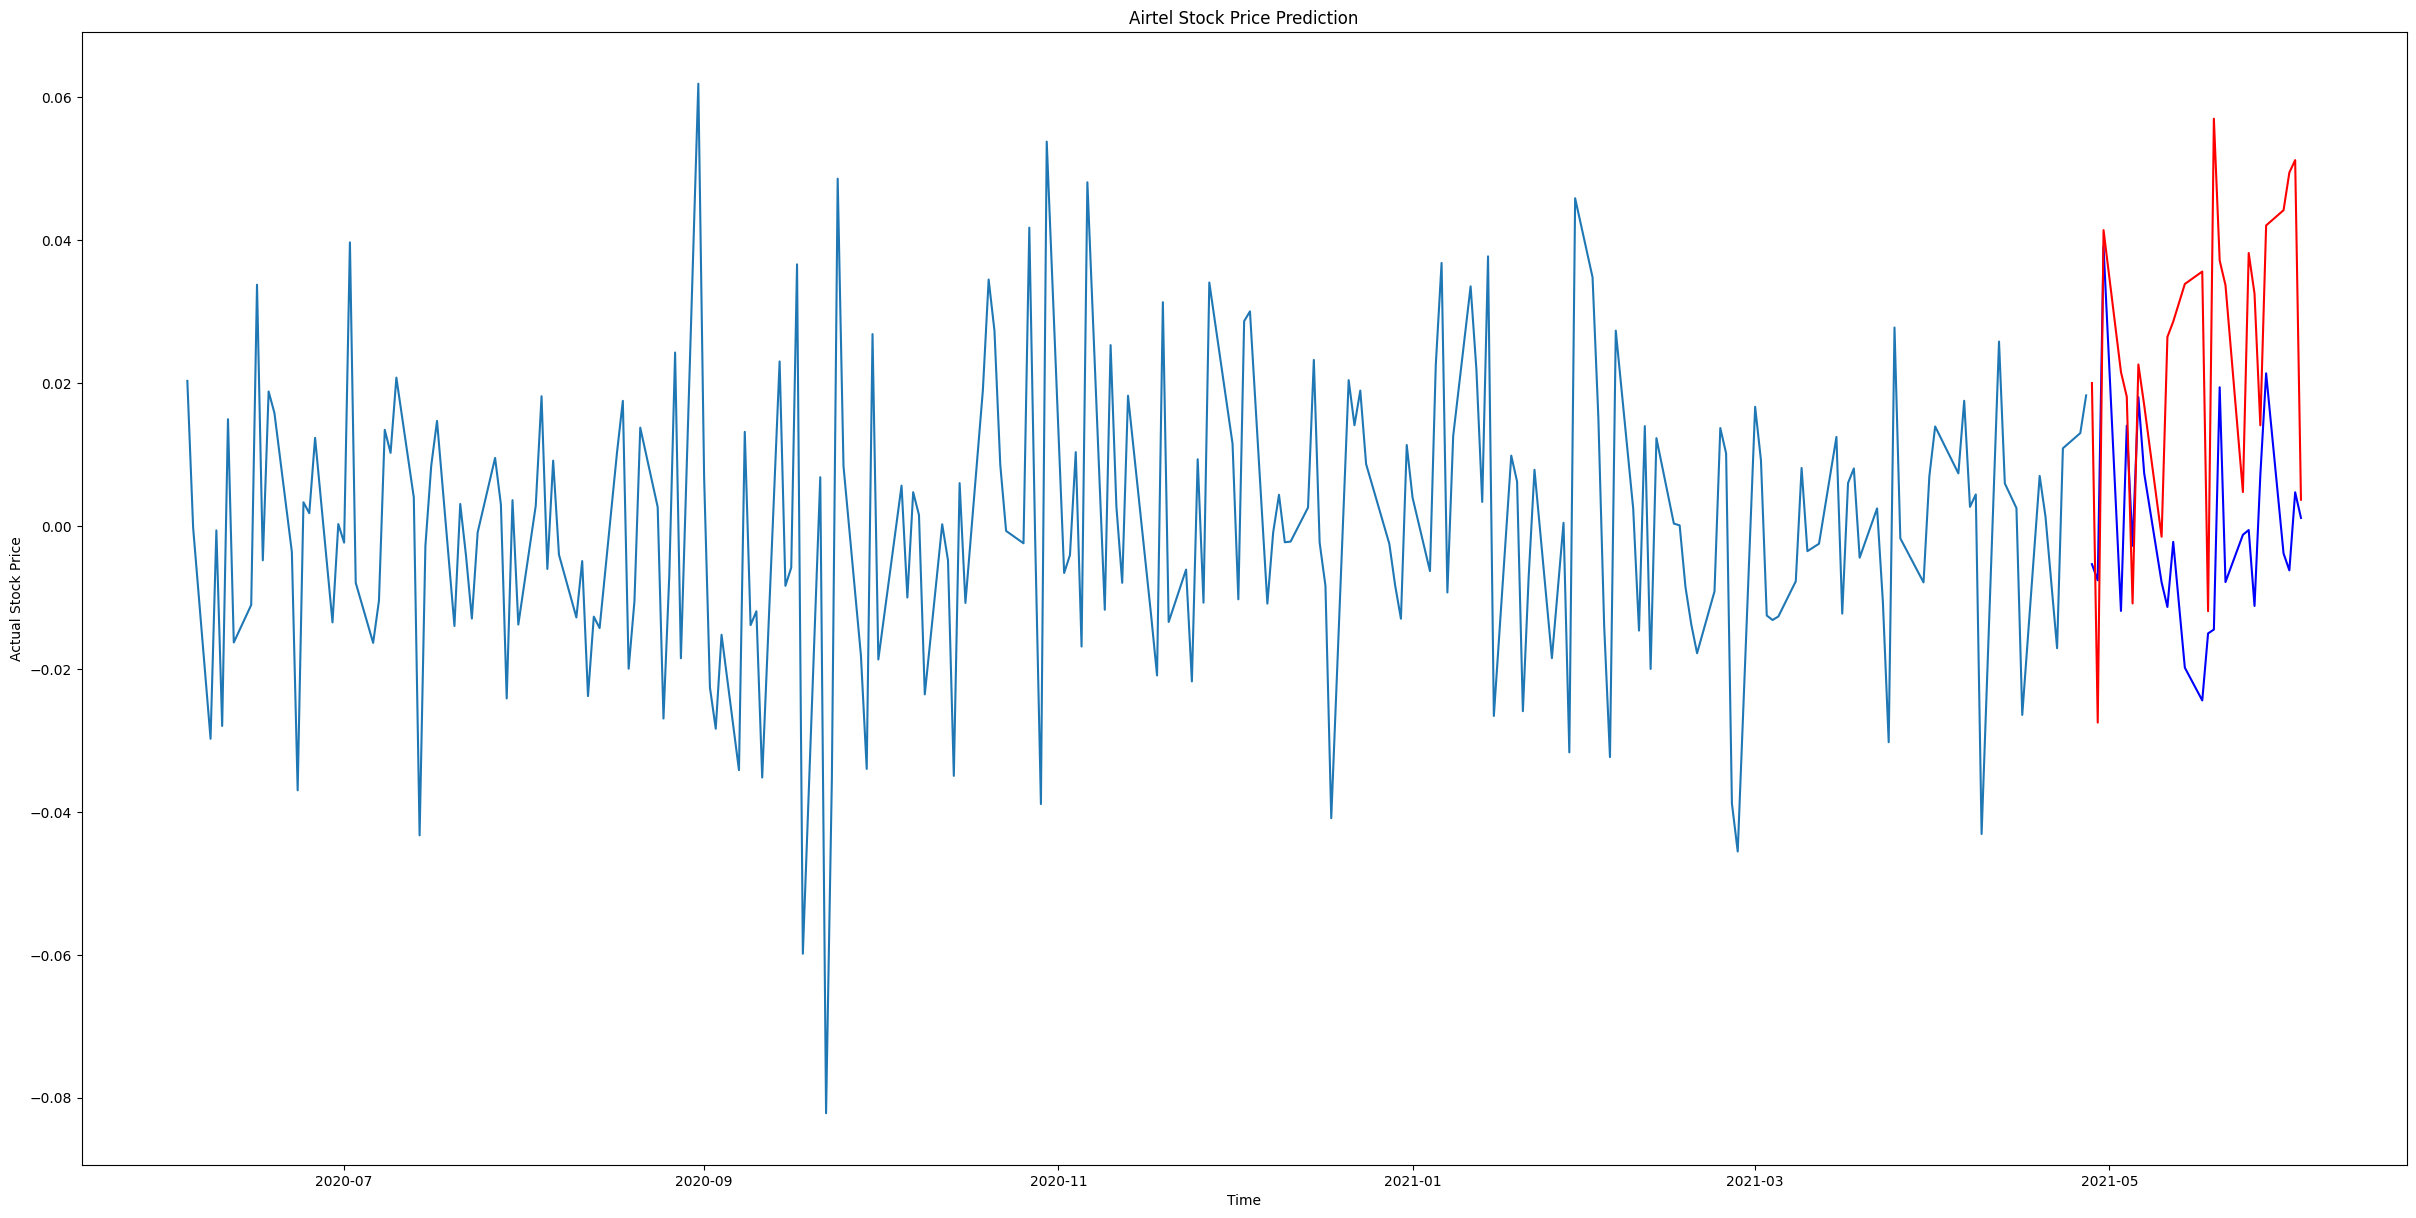

In [94]:
# Considering all the Dates in dataset

plt.figure(figsize=(30,15), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(pred, color = 'red',label='Predicted Stock Price')
plt.title('Airtel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')



In [72]:
test_data.mean()

-0.0008285425747609487

In [73]:
# report performance

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

mse = mean_squared_error(test_data, pred)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, pred)
print('MAE: '+str(mae))
rmse = sqrt(mean_squared_error(test_data, pred))
print('RMSE: '+str(rmse))


MSE: 0.0011498637147720524
MAE: 0.026864306506070048
RMSE: 0.03390964044002903


# **Forecasting**

In [74]:
Full_data_train = pd.concat([train_data, test_data])
len(Full_data_train)

250

In [79]:
model2 = sm.tsa.statespace.SARIMAX(Full_data_train, order=(0,1,0), seasonal_order = (0,1,0,12))
model2 = model2.fit()


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [99]:
index_future_dates =pd.date_range(start='2021-06-04',end= '2021-07-31')
#print(index_future_dates)
pred2 = model2.predict(start = len(test_data), end = len(test_data)+57, typ = 'levels').rename('SARIMA PREDICTIONS')
pred2.index = index_future_dates
print(pred2)

2021-06-04    0.050524
2021-06-05    0.019224
2021-06-06    0.014539
2021-06-07   -0.069092
2021-06-08    0.011005
2021-06-09    0.005815
2021-06-10    0.056690
2021-06-11   -0.061608
2021-06-12   -0.005326
2021-06-13    0.001671
2021-06-14    0.010952
2021-06-15   -0.004112
2021-06-16    0.020039
2021-06-17   -0.013747
2021-06-18   -0.071398
2021-06-19    0.044135
2021-06-20   -0.002633
2021-06-21    0.009118
2021-06-22   -0.010543
2021-06-23    0.011058
2021-06-24    0.001838
2021-06-25   -0.012755
2021-06-26   -0.000735
2021-06-27    0.005504
2021-06-28   -0.030311
2021-06-29   -0.039813
2021-06-30    0.013455
2021-07-01   -0.007100
2021-07-02    0.034120
2021-07-03   -0.004652
2021-07-04   -0.034681
2021-07-05    0.028903
2021-07-06   -0.010509
2021-07-07   -0.035715
2021-07-08    0.000964
2021-07-09    0.005376
2021-07-10   -0.007391
2021-07-11    0.060265
2021-07-12    0.031330
2021-07-13   -0.015402
2021-07-14   -0.065835
2021-07-15   -0.005768
2021-07-16   -0.009883
2021-07-17 

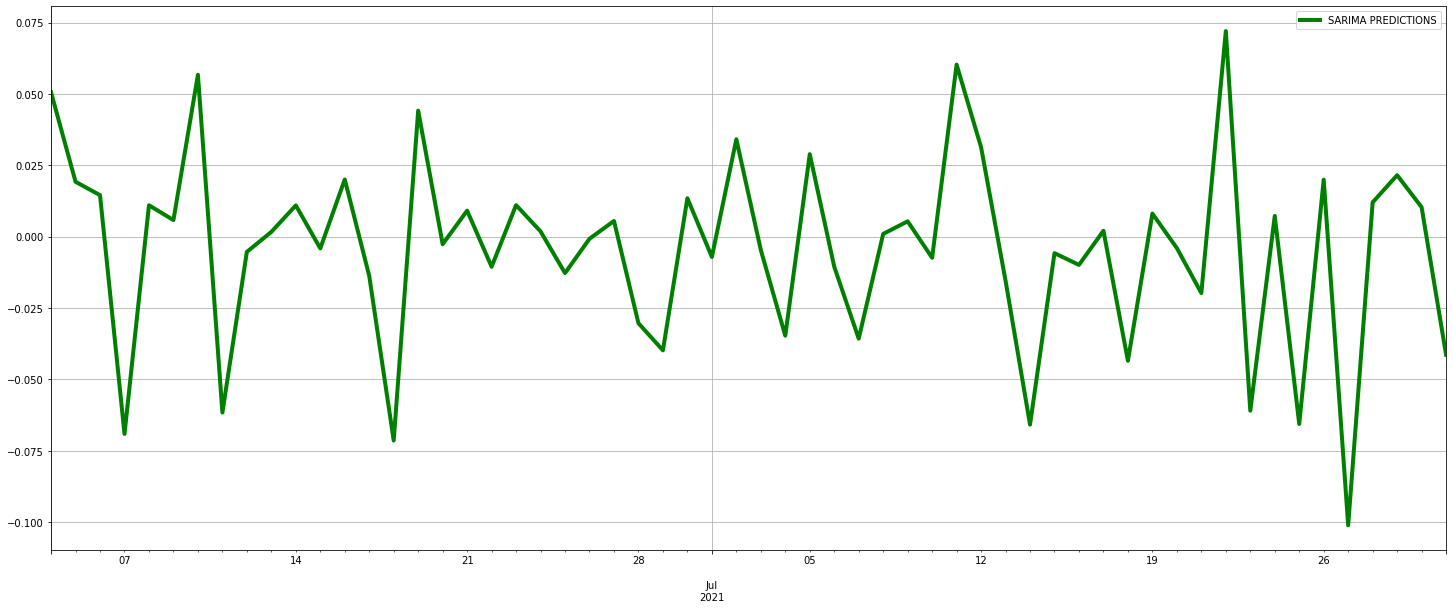

In [102]:
#Below graph shows only Forecast values 
pred2.plot(figsize=(25,10), legend = True, color = 'green', linewidth = 4)
plt.grid()

Text(0, 0.5, 'Actual Stock Price')

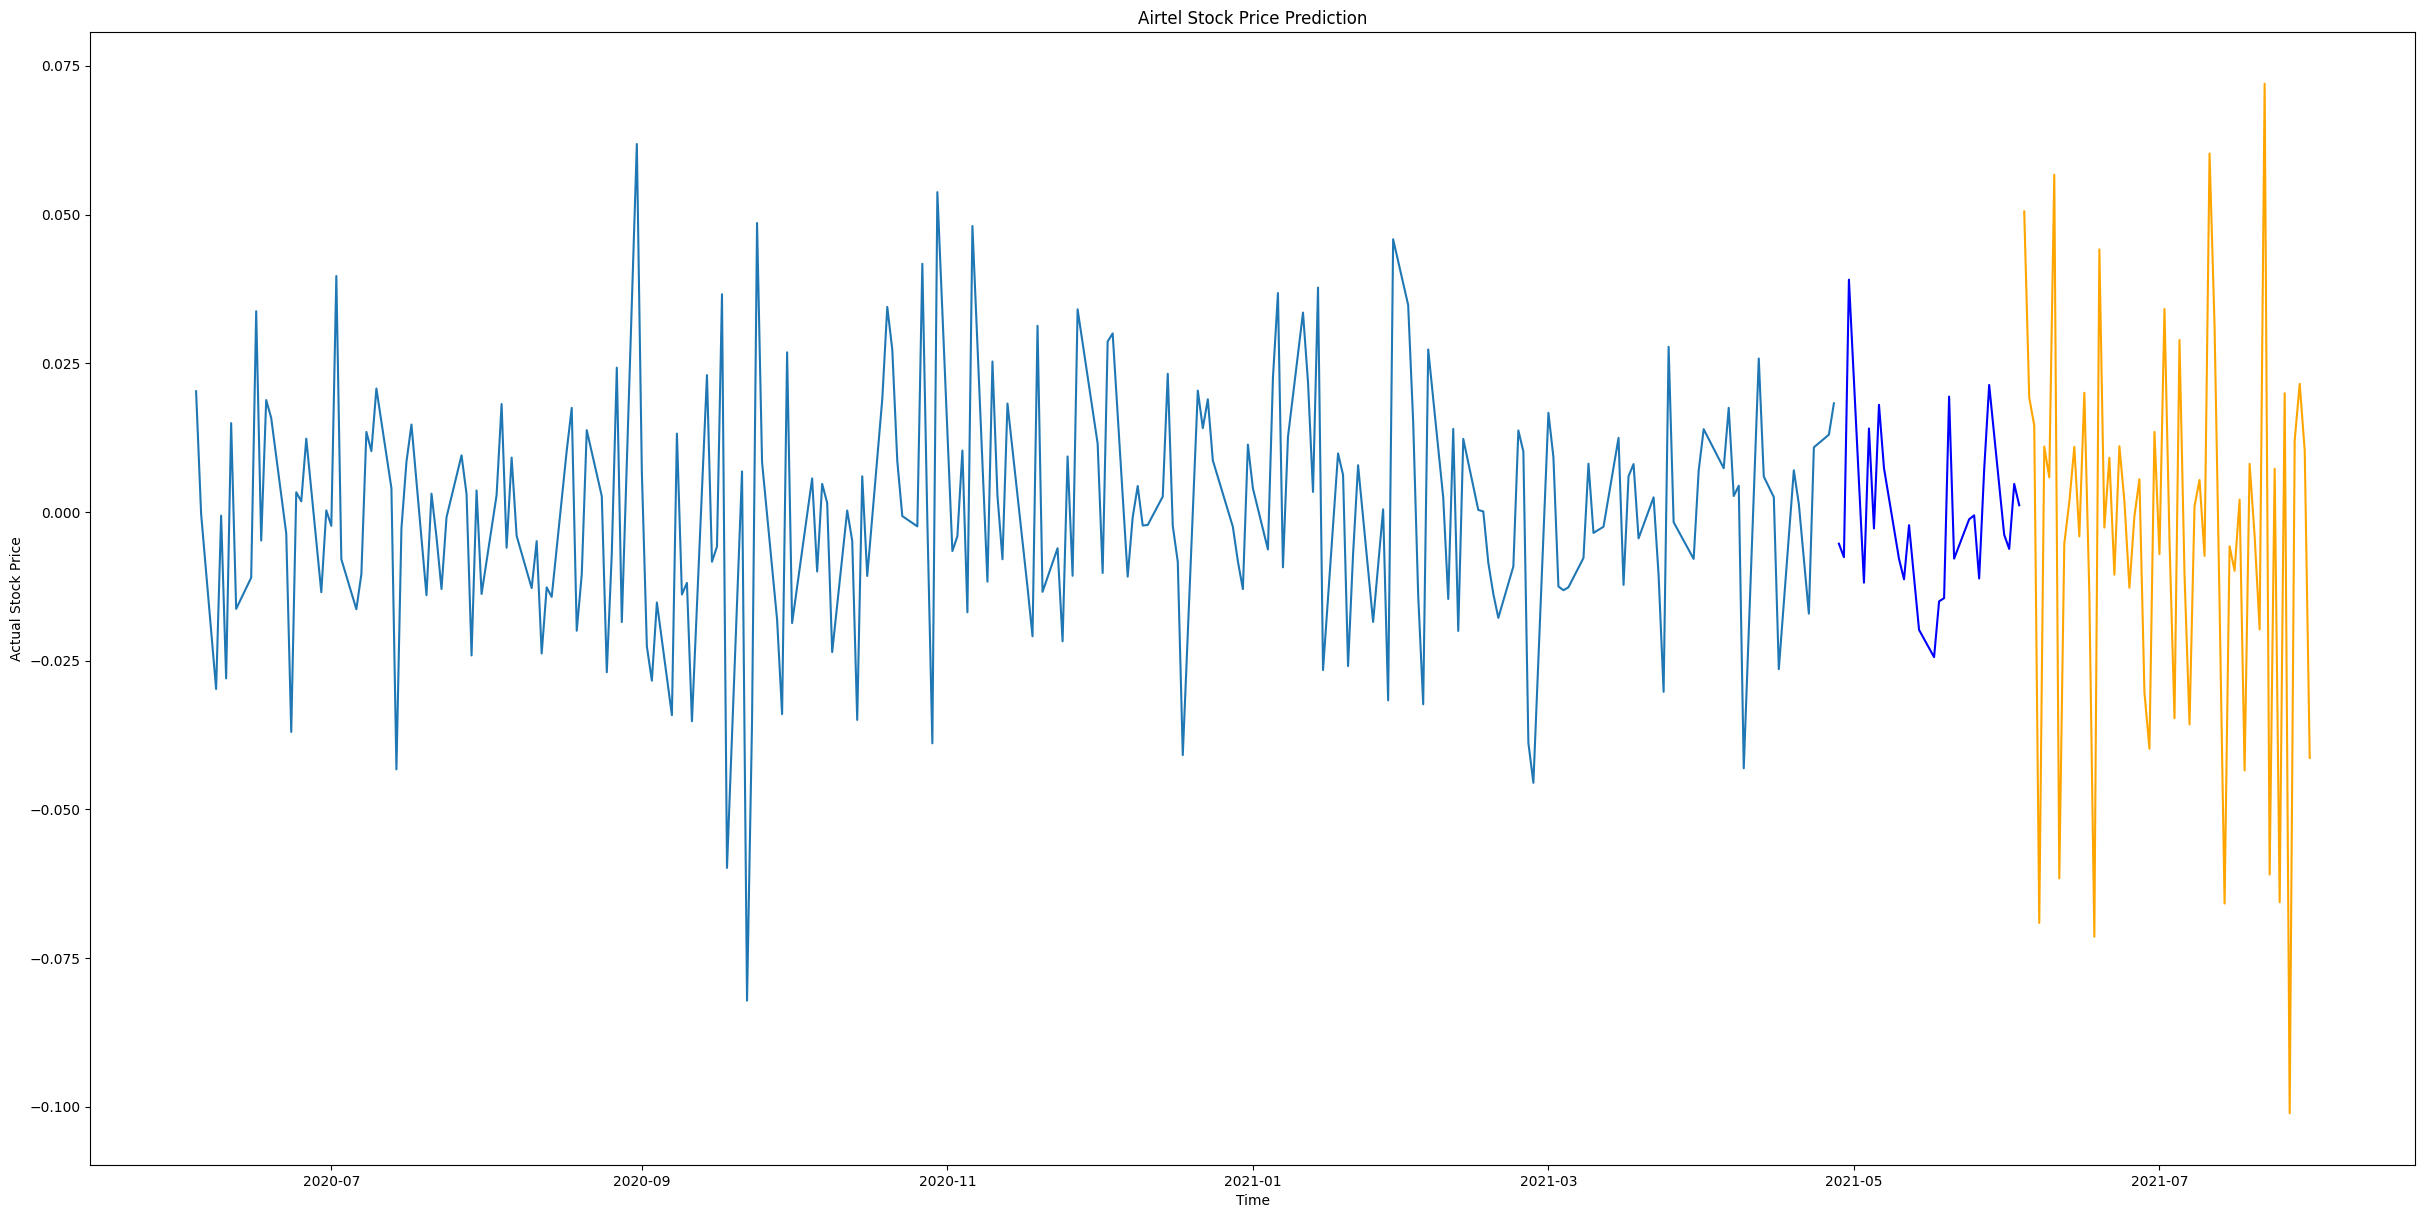

In [91]:
plt.figure(figsize=(30,15), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(pred2, color = 'orange',label='Predicted Stock Price')
plt.title('Airtel Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Actual Stock Price')


Values of y_axis seems low, because we performed multiple conversions like log and differencing to make data stationary.